### This are the expected hits for each querry

In [40]:
expected_langs = [
    {
        "name": "title:Python",
        "expected_langs": [{"lang": "Python", "rank": 1}],
    },
    {
        "name": "title:Python3",
        "expected_langs": [{"lang": "Python", "rank": 1}],
    },
    {
        "name": 'title:"Python3.12"',
        "expected_langs": [{"lang": "Python", "rank": 1}],
    },
    {
        "name": "title:Go",
        "expected_langs": [{"lang": "Go", "rank": 1}],
    },
    {
        "name": "title:Golang",
        "expected_langs": [{"lang": "Go", "rank": 1}],
    },
    {
        "name": "document:functional",
        "expected_langs": [
            {"lang": "Haskell",      "rank": 1},
            {"lang": "Elixir",       "rank": 2},
            {"lang": "Scala",        "rank": 3},
            {"lang": "R",            "rank": 4},
            {"lang": "Rust",         "rank": 5},
            {"lang": "Python",       "rank": 6},
            {"lang": "TypeScript",   "rank": 7},
            {"lang": "JavaScript",   "rank": 8},
            {"lang": "Kotlin",       "rank": 9},
            {"lang": "Swift",        "rank": 10},
            {"lang": "Lua",          "rank": 11},
            {"lang": "Ruby",         "rank": 12},
            {"lang": "Apache Groovy","rank": 13},
        ]
    },
    {
        "name": "document:declarative",
        "expected_langs": [
            {"lang": "Haskell",      "rank": 1},
            {"lang": "Elixir",       "rank": 2},
            {"lang": "Scala",        "rank": 3},
            {"lang": "R",            "rank": 4},
            {"lang": "Rust",         "rank": 5},
            {"lang": "Python",       "rank": 6},
            {"lang": "TypeScript",   "rank": 7},
            {"lang": "JavaScript",   "rank": 8},
            {"lang": "Kotlin",       "rank": 9},
            {"lang": "Swift",        "rank": 10},
            {"lang": "Lua",          "rank": 11},
            {"lang": "Ruby",         "rank": 12},
            {"lang": "Apache Groovy","rank": 13},
        ]
    },
    {
        "name": "document:object-oriented",
        "expected_langs": [
            {"lang": "Java",         "rank": 1},
            {"lang": "C Sharp",      "rank": 2},
            {"lang": "C++",          "rank": 3},
            {"lang": "Kotlin",       "rank": 4},
            {"lang": "Swift",        "rank": 5},
            {"lang": "Apache Groovy","rank": 6},
            {"lang": "Python",       "rank": 7},
            {"lang": "Ruby",         "rank": 8},
            {"lang": "TypeScript",   "rank": 9},
            {"lang": "JavaScript",   "rank": 10},
            {"lang": "PowerShell",   "rank": 11},
            {"lang": "Go",           "rank": 12},
            {"lang": "Rust",         "rank": 13},
            {"lang": "Dart",         "rank": 14},
            {"lang": "Scala",        "rank": 15},
            {"lang": "Mathlab",      "rank": 16},
            {"lang": "Lua",          "rank": 17}
        ]
    },
    {
        "name": "document:imperative",
        "expected_langs": [
            {"lang": "Java",         "rank": 1},
            {"lang": "C Sharp",      "rank": 2},
            {"lang": "C++",          "rank": 3},
            {"lang": "Kotlin",       "rank": 4},
            {"lang": "Swift",        "rank": 5},
            {"lang": "Apache Groovy","rank": 6},
            {"lang": "Python",       "rank": 7},
            {"lang": "Ruby",         "rank": 8},
            {"lang": "TypeScript",   "rank": 9},
            {"lang": "JavaScript",   "rank": 10},
            {"lang": "PowerShell",   "rank": 11},
            {"lang": "Go",           "rank": 12},
            {"lang": "Rust",         "rank": 13},
            {"lang": "Dart",         "rank": 14},
            {"lang": "Scala",        "rank": 15},
            {"lang": "Mathlab",      "rank": 16},
            {"lang": "Lua",          "rank": 17}
        ]
    },
    {
        "name": "title:C#",
        "expected_langs": [{"lang": "C Sharp", "rank": 1}],
    },
    {
        "name": "title:C Sharp",
        "expected_langs": [{"lang": "C Sharp", "rank": 1}],
    },
    {
        "name": "title:C++",
        "expected_langs": [
            {"lang": "C++", "rank": 1},
            {"lang": "C",   "rank": 2}
        ],
    },
    {
        "name": "title:C plus plus",
        "expected_langs": [
            {"lang": "C++", "rank": 1},
            {"lang": "C",   "rank": 2}
        ],
    },
    {
        "name": "document:\"JavaScript framework\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "name": "document:\"Javascrit framework\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "name": "document:\"most modern programming languages\"",
        "expected_langs": [
            {"lang": "Rust",       "rank": 1},
            {"lang": "Go",         "rank": 2},
            {"lang": "Swift",      "rank": 3},
            {"lang": "Kotlin",     "rank": 4},
            {"lang": "TypeScript", "rank": 5},
            {"lang": "Dart",       "rank": 6},
            {"lang": "Zig",        "rank": 7},
            {"lang": "Elixir",     "rank": 8}
        ]
    },
    {
        "name": "document:\"modern programming languages\"",
        "expected_langs": [
            {"lang": "Rust",       "rank": 1},
            {"lang": "Go",         "rank": 2},
            {"lang": "Swift",      "rank": 3},
            {"lang": "Kotlin",     "rank": 4},
            {"lang": "TypeScript", "rank": 5},
            {"lang": "Dart",       "rank": 6},
            {"lang": "Zig",        "rank": 7},
            {"lang": "Elixir",     "rank": 8}
        ]
    },
    {
        "name": "document:\"trendy programming languages\"",
        "expected_langs": [
            {"lang": "Rust",       "rank": 1},
            {"lang": "Go",         "rank": 2},
            {"lang": "Swift",      "rank": 3},
            {"lang": "Kotlin",     "rank": 4},
            {"lang": "TypeScript", "rank": 5},
            {"lang": "Dart",       "rank": 6},
            {"lang": "Zig",        "rank": 7},
            {"lang": "Elixir",     "rank": 8}
        ]
    },
    {
        "name": "document:\"What is the best programming language for web development\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "name": "document:\"Top programming languages for web development\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "name": "document:\"Best coding languages for building websites\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "name": "document:\"Best programming language for web development\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "name": "document:\"Best systems programming language for safety\"",
        "expected_langs": [
            {"lang": "Rust",   "rank": 1},
            {"lang": "Swift",  "rank": 2},
            {"lang": "Zig",    "rank": 3},
            {"lang": "Go",     "rank": 4}
        ]
    },
    {
        "name": "document:\"What is a memory-safe programming language\"",
        "expected_langs": [
            {"lang": "Rust",   "rank": 1},
            {"lang": "Swift",  "rank": 2},
            {"lang": "Zig",    "rank": 3}
        ]
    },
    {
        "name": "document:\"Most secure programming language\"",
        "expected_langs": [
            {"lang": "Rust", "rank": 1}
        ]
    }
]


### These are the F1 score evaluations for the non-optimized search engine.

In [ ]:
import requests

def precision(TP, FP):
    """Precision = TP / (TP + FP)"""
    if TP + FP == 0:
        return 0
    return float(TP / (TP + FP))


def recall(TP, FN):
    """Recall = TP / (TP + FN)"""
    if TP + FN == 0:
        return 0
    return float(TP / (TP + FN))


def f1_score(precision, recall):
    """F1-Score = 2 * (precision * recall) / (precision + recall)"""
    if precision + recall == 0:
        return 0
    return float(2 * (precision * recall) / (precision + recall))

[title:Python] F1-Score 1.00
[title:Python3] F1-Score 0.00
[title:Python3.12] F1-Score 0.00
[title:Go] F1-Score 1.00
[title:Golang] F1-Score 0.00
[document:functional] F1-Score 0.70
[document:declarative] F1-Score 0.59
[document:object-oriented] F1-Score 0.78
[document:imperative] F1-Score 0.40
[title:C#] F1-Score 0.50
[title:"C%20Sharp"] F1-Score 1.00
[title:C++] F1-Score 0.80
[title:C plus plus] F1-Score 0.00
[document:"JavaScript framework"] F1-Score 0.80
[document:"Javascrit framework"] F1-Score 0.00
[document:"most modern programming languages"] F1-Score 0.00
[document:"modern programming languages"] F1-Score 0.22
[document:"trendy programming languages"] F1-Score 0.00
[document:"What is the best programming language for web development"] F1-Score 0.00
[document:"Top programming languages for web development"] F1-Score 0.00
[document:"Best coding languages for building websites"] F1-Score 0.00
[document:"Best programming language for web development"] F1-Score 0.00
[document:"Best

### The F1 Scores after optimizing the search engine

[title:Python] F1-Score 1.00
[title:Python3] F1-Score 1.00
[title:Python3.12] F1-Score 1.00
[title:Go] F1-Score 1.00
[title:Golang] F1-Score 1.00
[document:functional] F1-Score 0.60
[document:declarative] F1-Score 0.60
[document:object-oriented] F1-Score 0.52
[document:imperative] F1-Score 0.33
[title:C#] F1-Score 1.00
[title:C Sharp] F1-Score 1.00
[title:C++] F1-Score 0.67
[title:C plus plus] F1-Score 0.67
[document:"JavaScript framework"] F1-Score 0.80
[document:"Javascrit framework"] F1-Score 0.00
[document:"most modern programming languages"] F1-Score 0.22
[document:"modern programming languages"] F1-Score 0.22
[document:"trendy programming languages"] F1-Score 0.22
[document:"What is the best programming language for web development"] F1-Score 0.00
[document:"Top programming languages for web development"] F1-Score 0.00
[document:"Best coding languages for building websites"] F1-Score 0.00
[document:"Best programming language for web development"] F1-Score 0.00
[document:"Best sys

In [43]:
def needs_quoting(term: str) -> bool:
    return any(ch.isspace() for ch in term) or not term.isalnum()

def build_solr_query(case):
    raw = case['name'].strip()
    if ':' in raw:
        field, rhs = raw.split(':', 1)
        rhs = rhs.strip()
        # Entferne vorhandene Anführungszeichen
        rhs_stripped = rhs.strip('"')
        if needs_quoting(rhs_stripped):
            rhs_quoted = f'"{rhs_stripped}"'
        else:
            rhs_quoted = rhs_stripped
        return f"{field}:{rhs_quoted}"
    else:
        return raw

def run_solr_query(query, solr_url):
    params = {
        'q': query,
        'rows': 30,
        'wt': 'json',
    }
    prepared = requests.Request('GET', solr_url, params=params).prepare()
    print("URL:", prepared.url)
    response = requests.get(solr_url, params=params)
    response.raise_for_status()
    return response.json()['response']['docs']

def extract_found_languages(docs, case):
    found = set()
    false_positive = set()
    lang_list = [x['lang'] for x in case['expected_langs']]
    for doc in docs:
        doc_title = doc.get('title', '').lower()
        for lang in lang_list:
            if lang.lower() in doc_title:
                found.add(lang)
            else:
                false_positive.add(lang)
    return found, false_positive

def compute_lang_sets(docs, case, expected_langs, found_langs):
    tp = found_langs & expected_langs
    fp = found_langs - expected_langs
    fn = expected_langs - found_langs
    return tp, fp, fn

def evaluate_case(case, solr_url, core):
    query = build_solr_query(case)
    docs = run_solr_query(query, solr_url)
    expected_langs  = {x["lang"] for x in case["expected_langs"]}
    found_langs = {doc.get('title').replace("(programming language)", "").strip() for doc in docs}
    
    tp_langs, fp_langs, fn_langs = compute_lang_sets(docs, case, expected_langs, found_langs)
    tp, fp, fn = len(tp_langs), len(fp_langs), len(fn_langs)

    pre = precision(tp, fp)
    rec = recall(tp, fn)
    f1 = f1_score(pre, rec)

    print(f"[{case['name']} @ {core}]")
    print(f"  Solr-Query = {query}")
    print(f"  Expected   = {sorted(expected_langs)}")
    print(f"  Found      = {sorted(found_langs)}")
    print(f"  TP={tp}, FP={fp}, FN={fn}")
    print(f"  Precision={pre:.2f}, Recall={rec:.2f}, F1={f1:.2f}\n")

    return {
        "core": core,
        "name": case["name"],
        "tp": tp, "fp": fp, "fn": fn,
        "s1_pre": pre, "s1_rec": rec, "s1_f1": f1,
        "found_langs": list(found_langs),
        "expected_langs": list(expected_langs)
    }
# Beispiel: core und Konfiguration
cores = ["ProgLang24", "ProgLang24_2"]

results = []
for core in cores:
    solr_url = f'http://10.248.16.116:8983/solr/{core}/select'
    for case in expected_langs:
        result = evaluate_case(case, solr_url, core)
        results.append(result)


URL: http://10.248.16.116:8983/solr/ProgLang24/select?q=title%3APython&rows=30&wt=json
[title:Python @ ProgLang24]
  Solr-Query = title:Python
  Expected   = ['Python']
  Found      = ['Python']
  TP=1, FP=0, FN=0
  Precision=1.00, Recall=1.00, F1=1.00

URL: http://10.248.16.116:8983/solr/ProgLang24/select?q=title%3APython3&rows=30&wt=json
[title:Python3 @ ProgLang24]
  Solr-Query = title:Python3
  Expected   = ['Python']
  Found      = []
  TP=0, FP=0, FN=1
  Precision=0.00, Recall=0.00, F1=0.00

URL: http://10.248.16.116:8983/solr/ProgLang24/select?q=title%3A%22Python3.12%22&rows=30&wt=json
[title:"Python3.12" @ ProgLang24]
  Solr-Query = title:"Python3.12"
  Expected   = ['Python']
  Found      = []
  TP=0, FP=0, FN=1
  Precision=0.00, Recall=0.00, F1=0.00

URL: http://10.248.16.116:8983/solr/ProgLang24/select?q=title%3AGo&rows=30&wt=json
[title:Go @ ProgLang24]
  Solr-Query = title:Go
  Expected   = ['Go']
  Found      = ['Go']
  TP=1, FP=0, FN=0
  Precision=1.00, Recall=1.00, F1=1

In [44]:
import json

with open("results.json", "w", encoding="utf-8") as f:
    json.dump(results, f, ensure_ascii=False, indent=2)

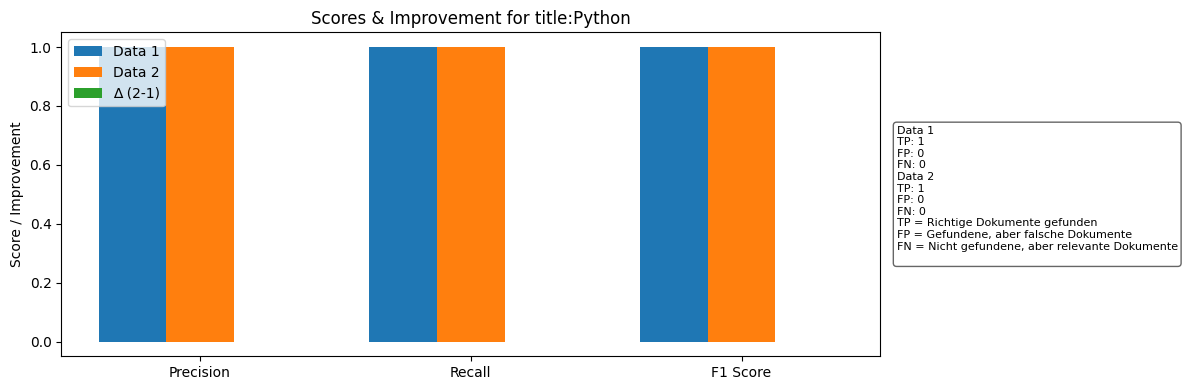

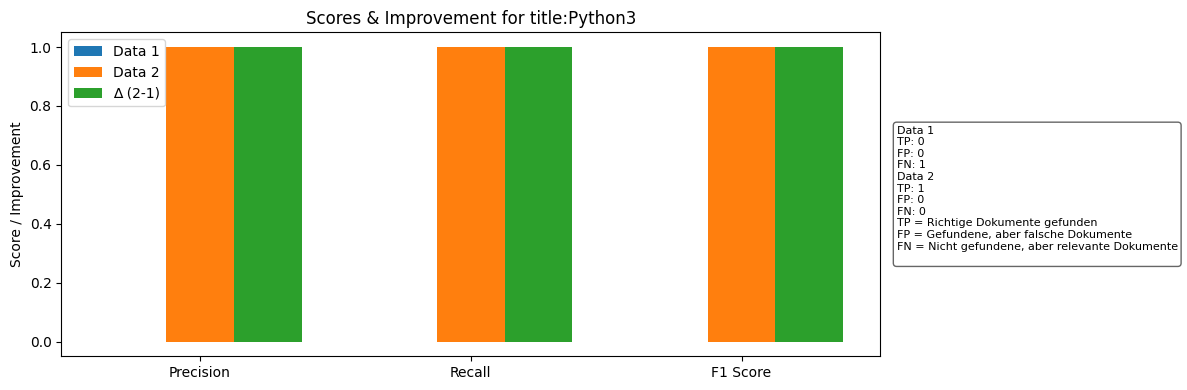

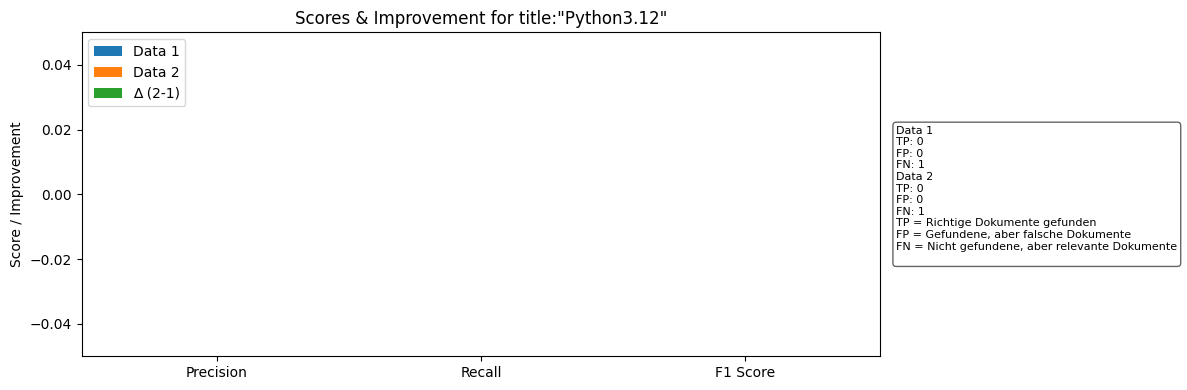

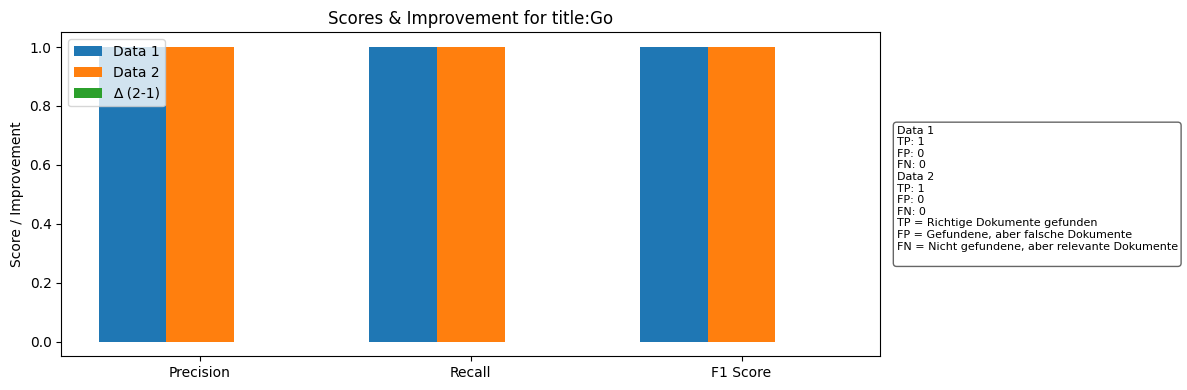

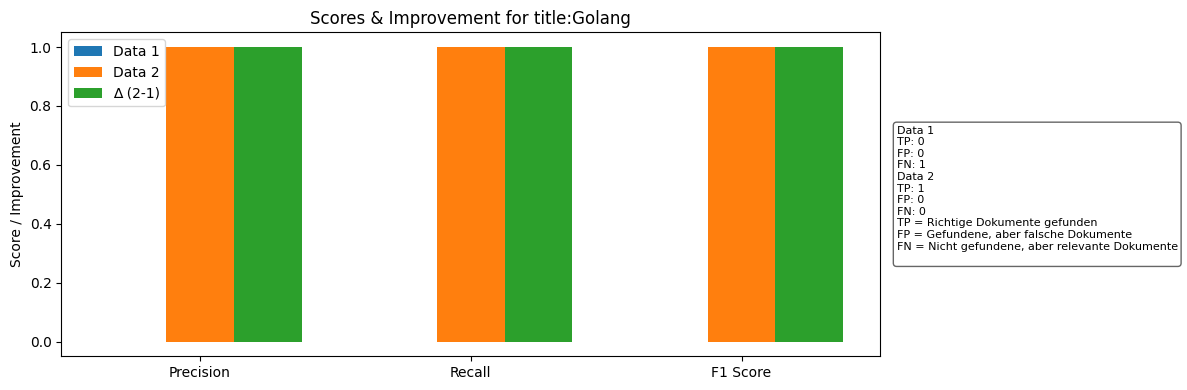

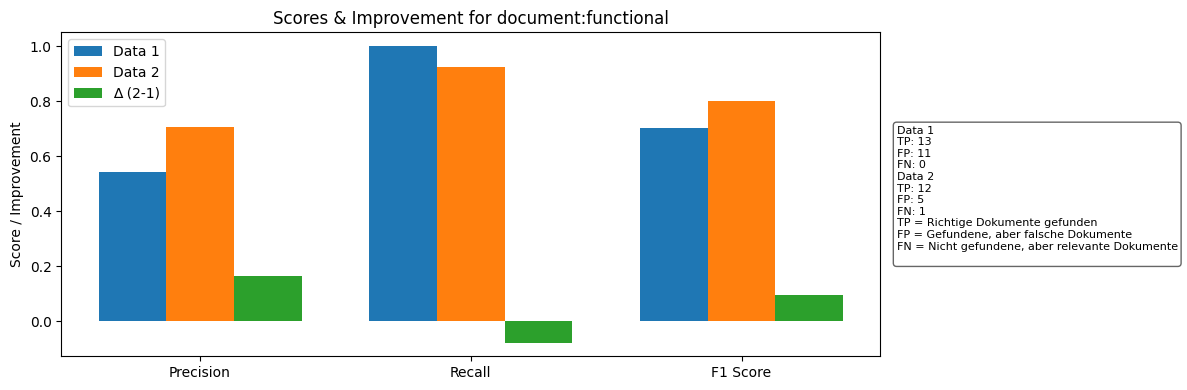

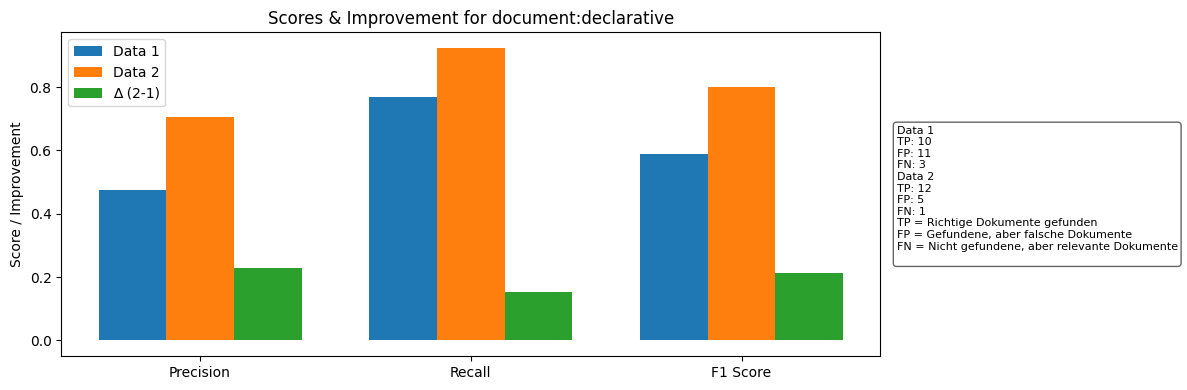

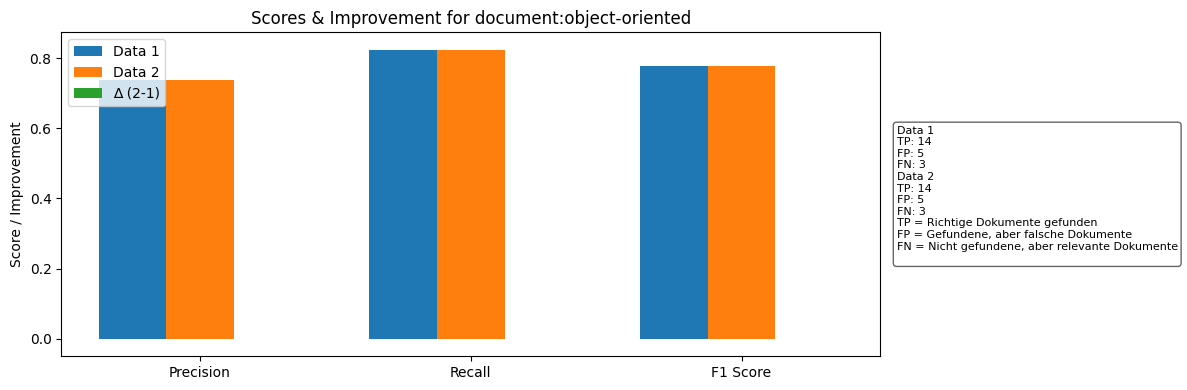

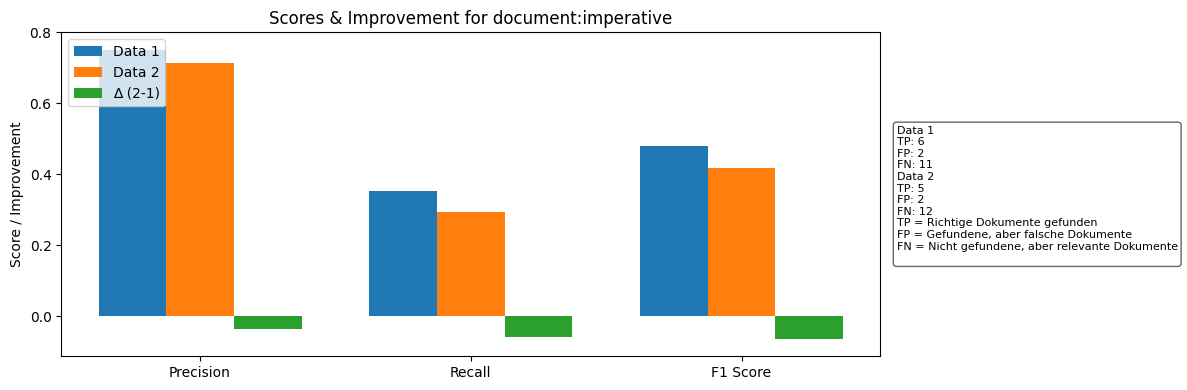

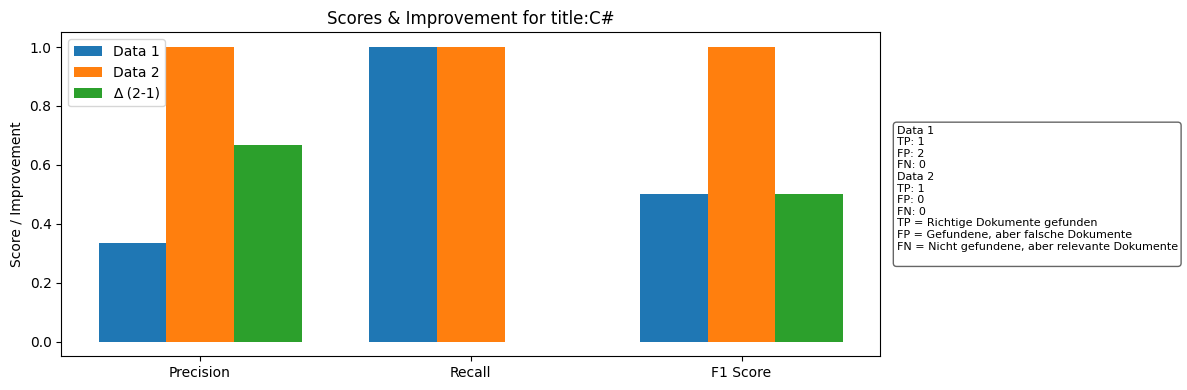

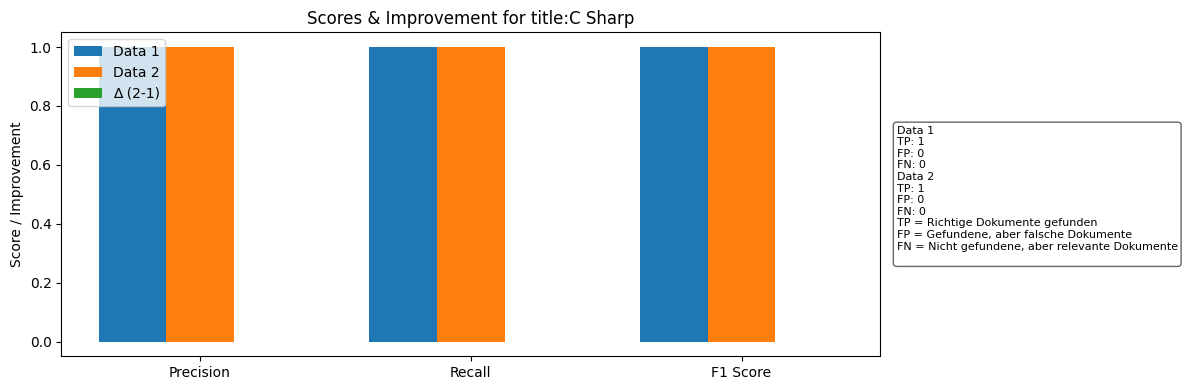

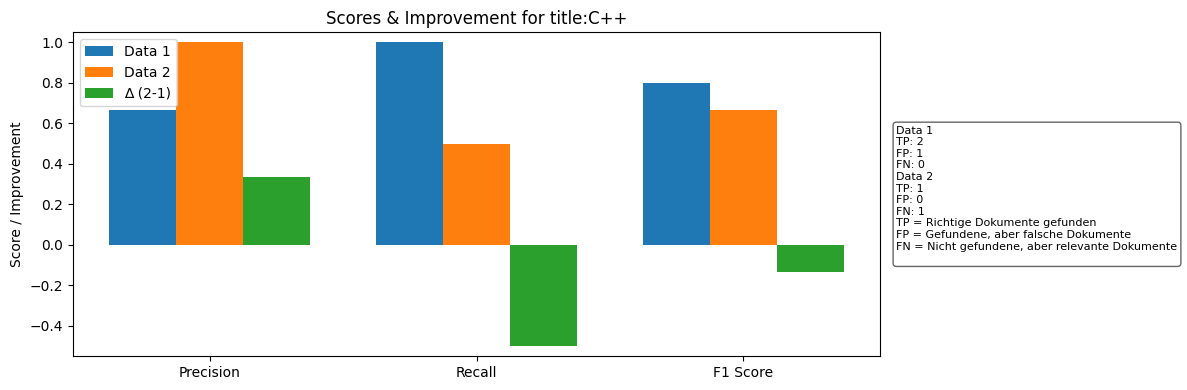

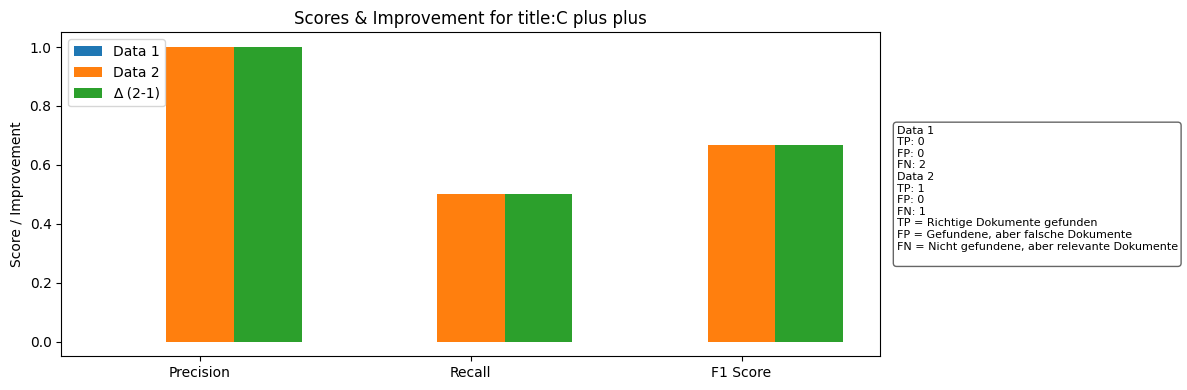

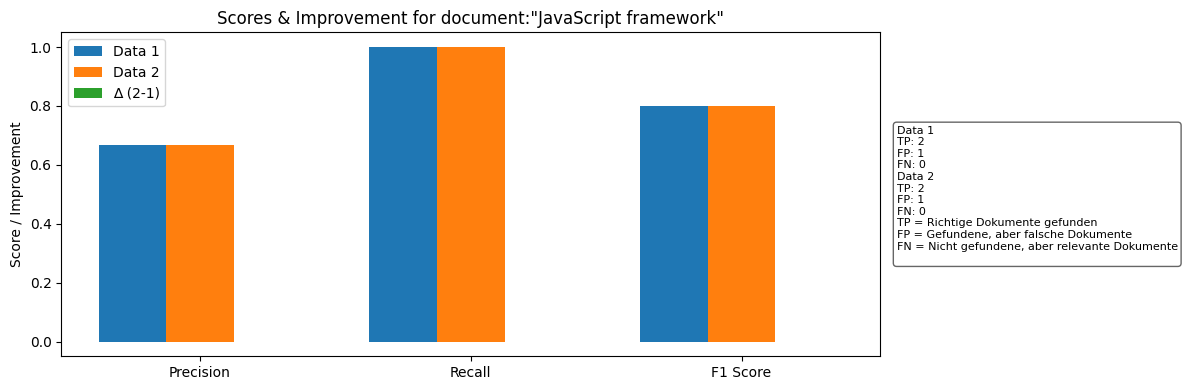

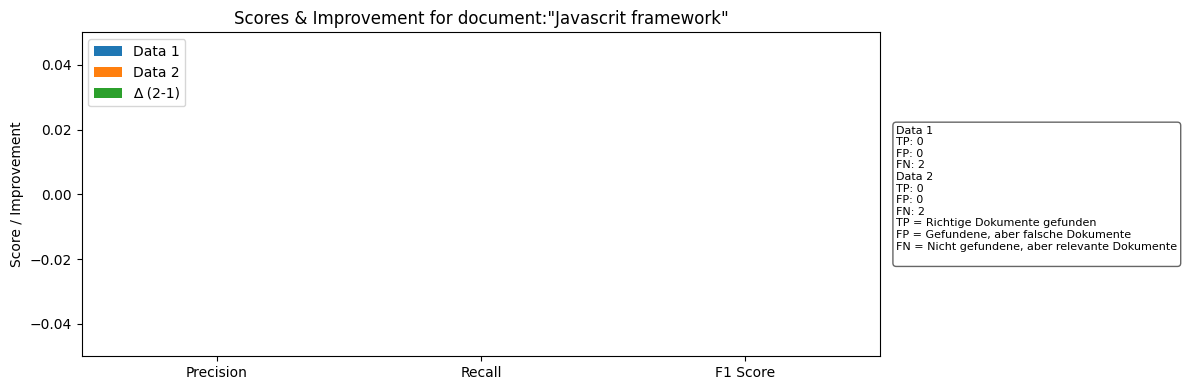

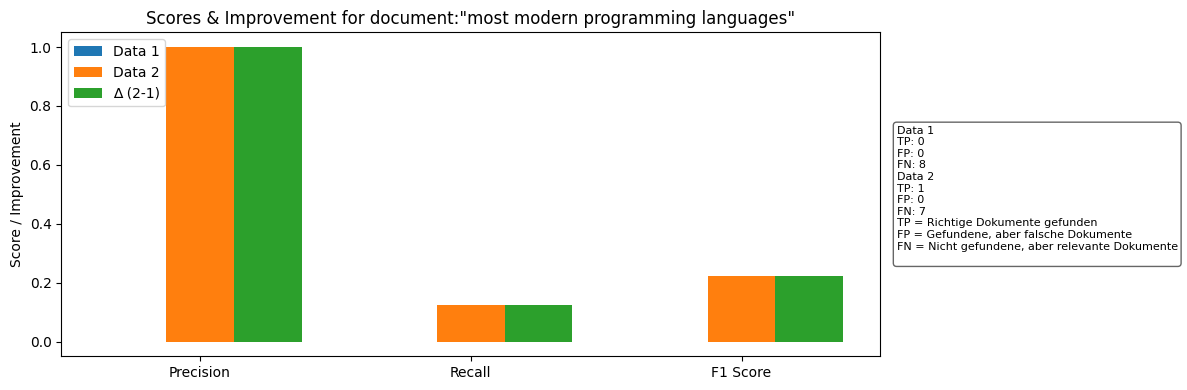

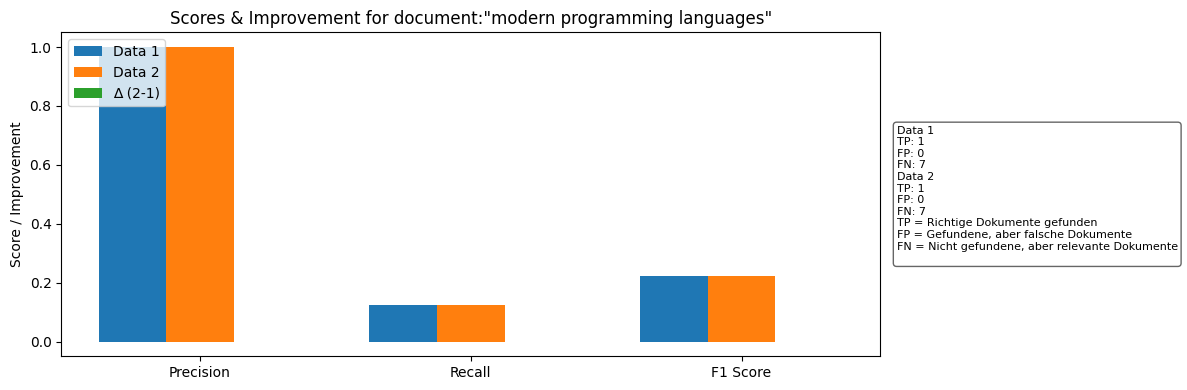

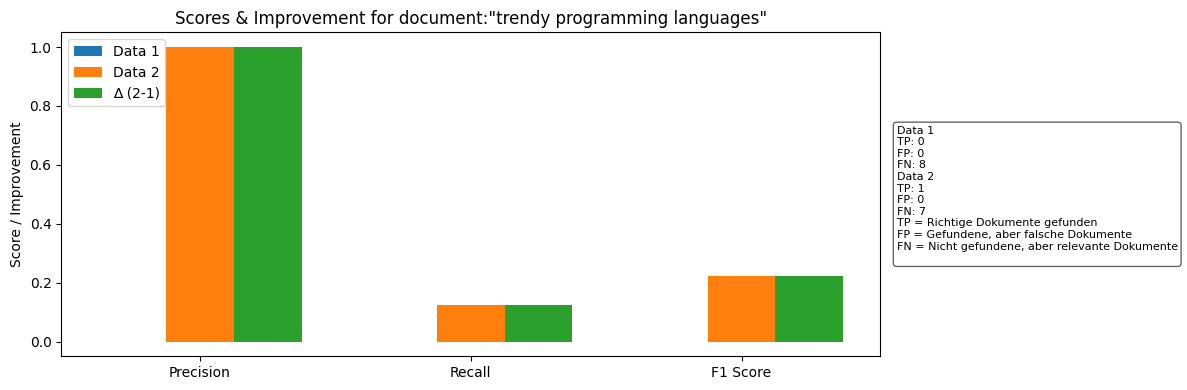

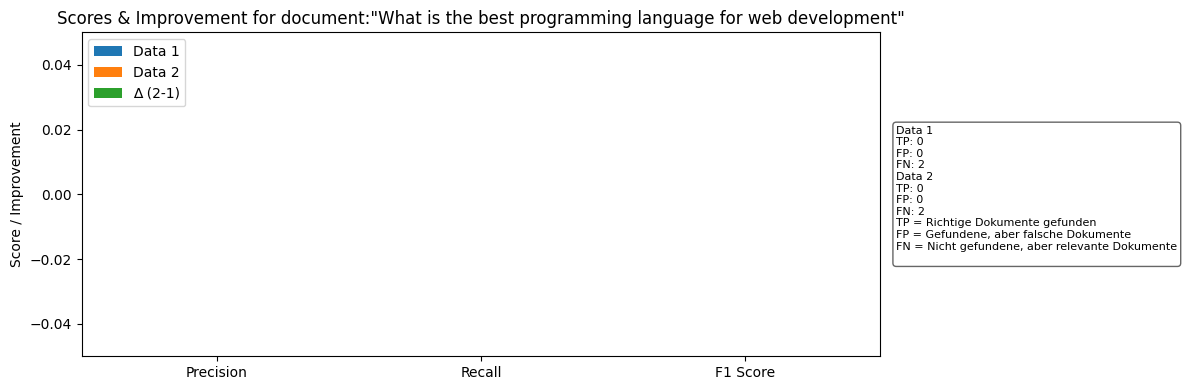

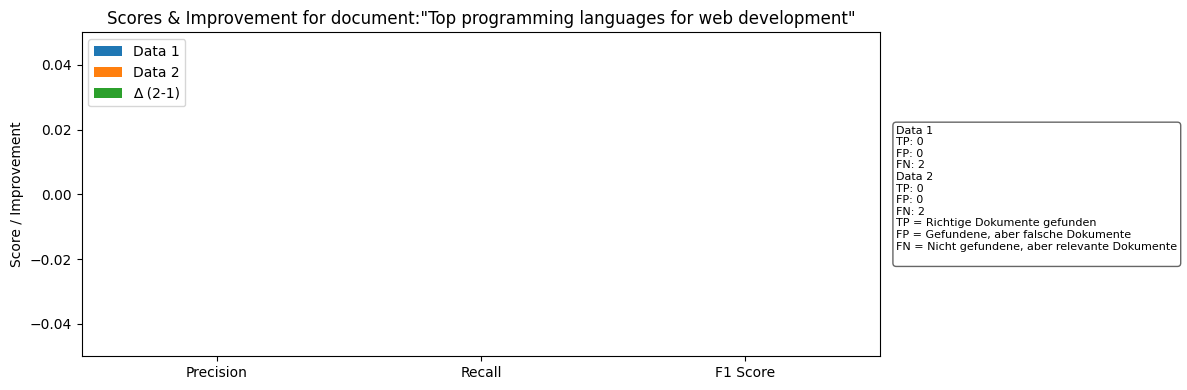

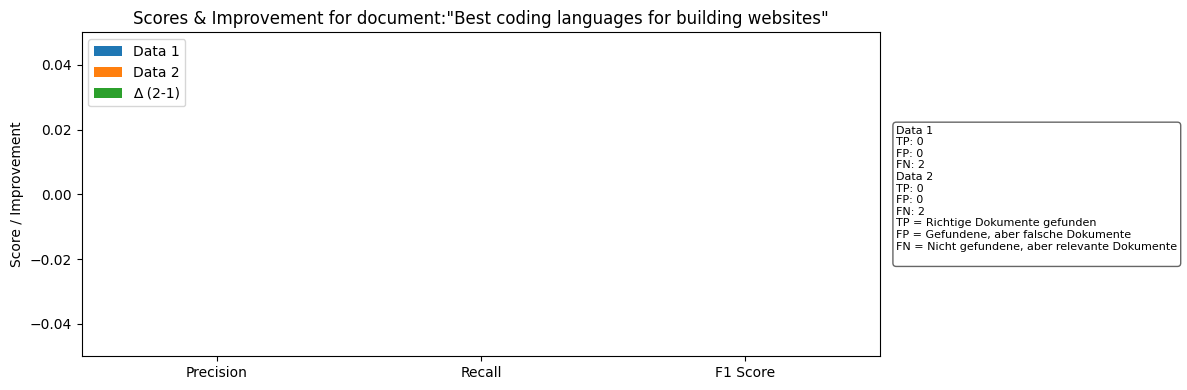

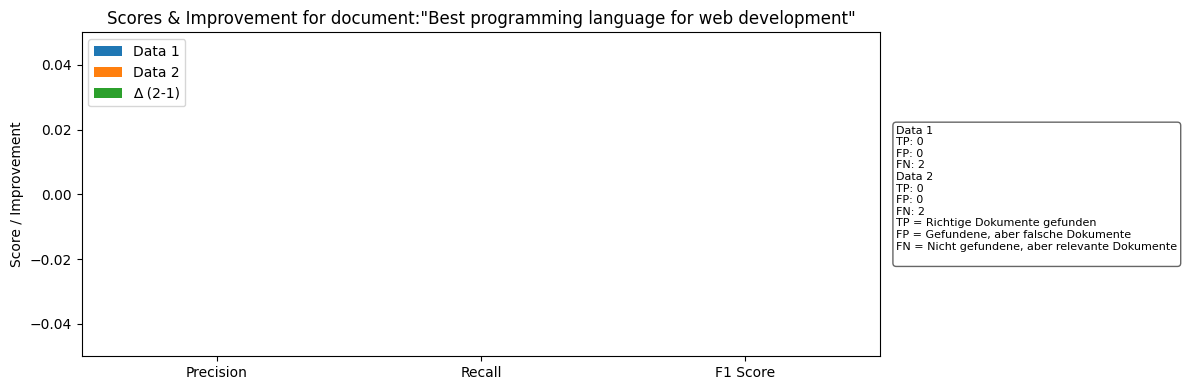

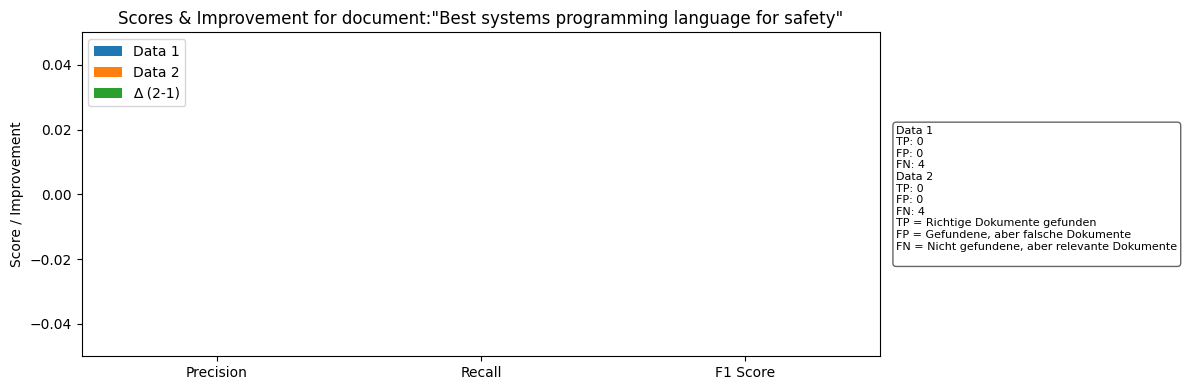

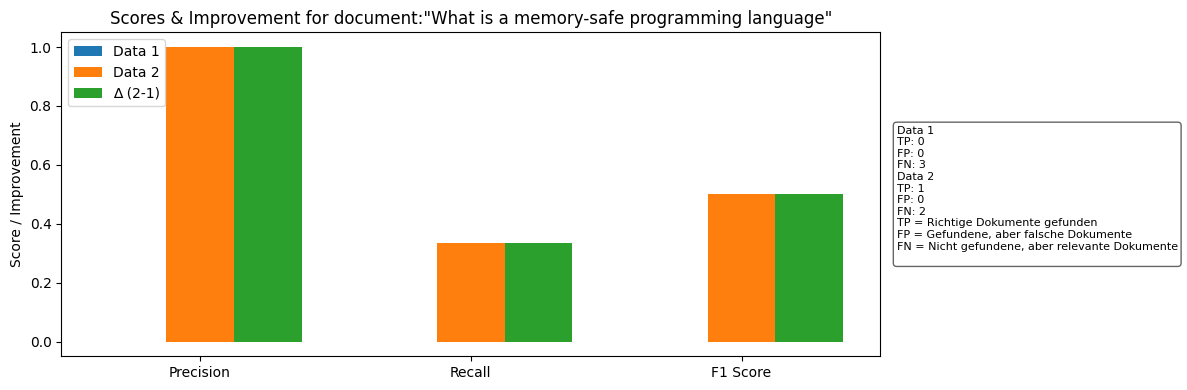

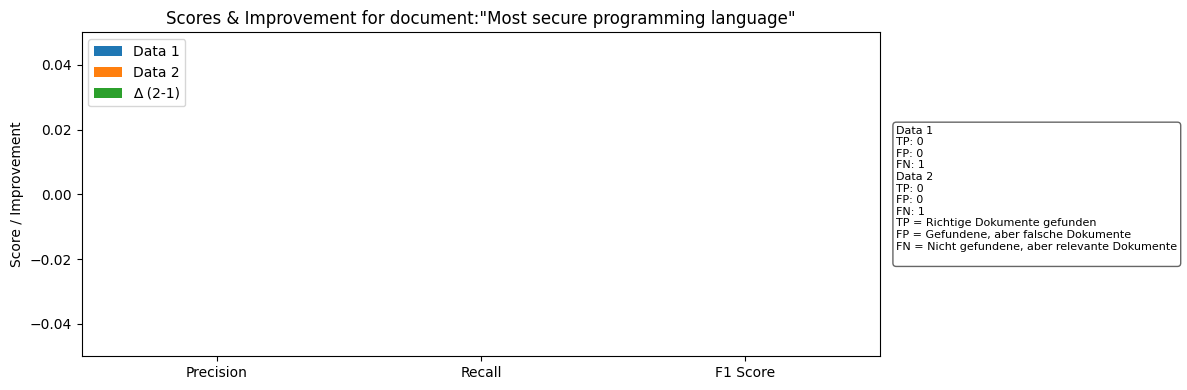

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# --- Adapter: Gruppiere results nach core ---
from collections import defaultdict

grouped = defaultdict(list)
for r in results:
    grouped[r["core"]].append(r)

# Gehe davon aus, dass genau zwei Cores da sind:
core_names = list(grouped.keys())
if len(core_names) != 2:
    raise ValueError("Erwarte genau 2 Cores, gefunden: " + ", ".join(core_names))

core1, core2 = core_names[0], core_names[1]
data1 = grouped[core1]
data2 = grouped[core2]

# Convert lists to dicts keyed by name
d1 = {d["name"]: d for d in data1}
d2 = {d["name"]: d for d in data2}

# Metrics and their labels
metrics = ["s1_pre", "s1_rec", "s1_f1"]
labels = ["Precision", "Recall", "F1 Score"]

# Plot improvement for each name
for name in d1:
    # raw scores + diff
    v1 = [d1[name][m] for m in metrics]
    v2 = [d2[name][m] for m in metrics]
    diff = [b - a for a, b in zip(v1, v2)]

    # build the plot
    x = np.arange(len(metrics))
    width = 0.25
    fig, ax = plt.subplots(figsize=(12, 4))

    ax.bar(x - width,   v1,   width, label="Data 1")
    ax.bar(x,           v2,   width, label="Data 2")
    ax.bar(x + width,   diff, width, label="∆ (2-1)")

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(
        min(min(diff), 0) - 0.05,
        max(v1 + v2 + diff) + 0.05
    )
    ax.set_ylabel("Score / Improvement")
    ax.set_title(f"Scores & Improvement for {name}")
    ax.legend(loc="upper left")

    # pull out TP/FP/FN from dataset 1 (or 2) and make the little comment box
    tp1, fp1, fn1 = d1[name]["tp"], d1[name]["fp"], d1[name]["fn"]
    tp2, fp2, fn2 = d2[name]["tp"], d2[name]["fp"], d2[name]["fn"]
    comment = (
        "Data 1\n"
        f"TP: {tp1}\n"
        f"FP: {fp1}\n"
        f"FN: {fn1}\n"
        "Data 2\n"
        f"TP: {tp2}\n"
        f"FP: {fp2}\n"
        f"FN: {fn2}\n"
        "TP = Richtige Dokumente gefunden\n"
        "FP = Gefundene, aber falsche Dokumente\n"
        "FN = Nicht gefundene, aber relevante Dokumente\n"
    )
    # place text to the right of the axes
    ax.text(1.02, 0.5, comment,
            transform=ax.transAxes,
            va="center", ha="left", fontsize=8,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="#666"))

    plt.tight_layout()
    plt.show()